# Halo shapes by meausuring the Shape tensor

The eigenvectors of the tensor give the direction of the princial axis, this is, 
the coordinates of the princial axis.

The eigen values are proportional to the length of the princial axis

## to -do : 
Something in the roation function is not working properly. Some times you have to multipy by eigvec.T 
and someting by eigenvec in the ellipse_3d_sartessian

In [21]:
#%pylab inline
%matplotlib notebook
#matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import jellyfish
import matplotlib.pyplot as plt
import pygadgetreader 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading halo data

In [3]:
pos_pr = pygadgetreader.readsnap('./Prolate06_010', 'pos', 'dm')

Returning DM    Positions


In [4]:
pos_tr_pr = pos_pr[np.where(np.sqrt(pos_pr[:,0]**2 + pos_pr[:,1]**2 + pos_pr[:,2]**2)<500)]

In [5]:
# plotting halo particles

<IPython.core.display.Javascript object>


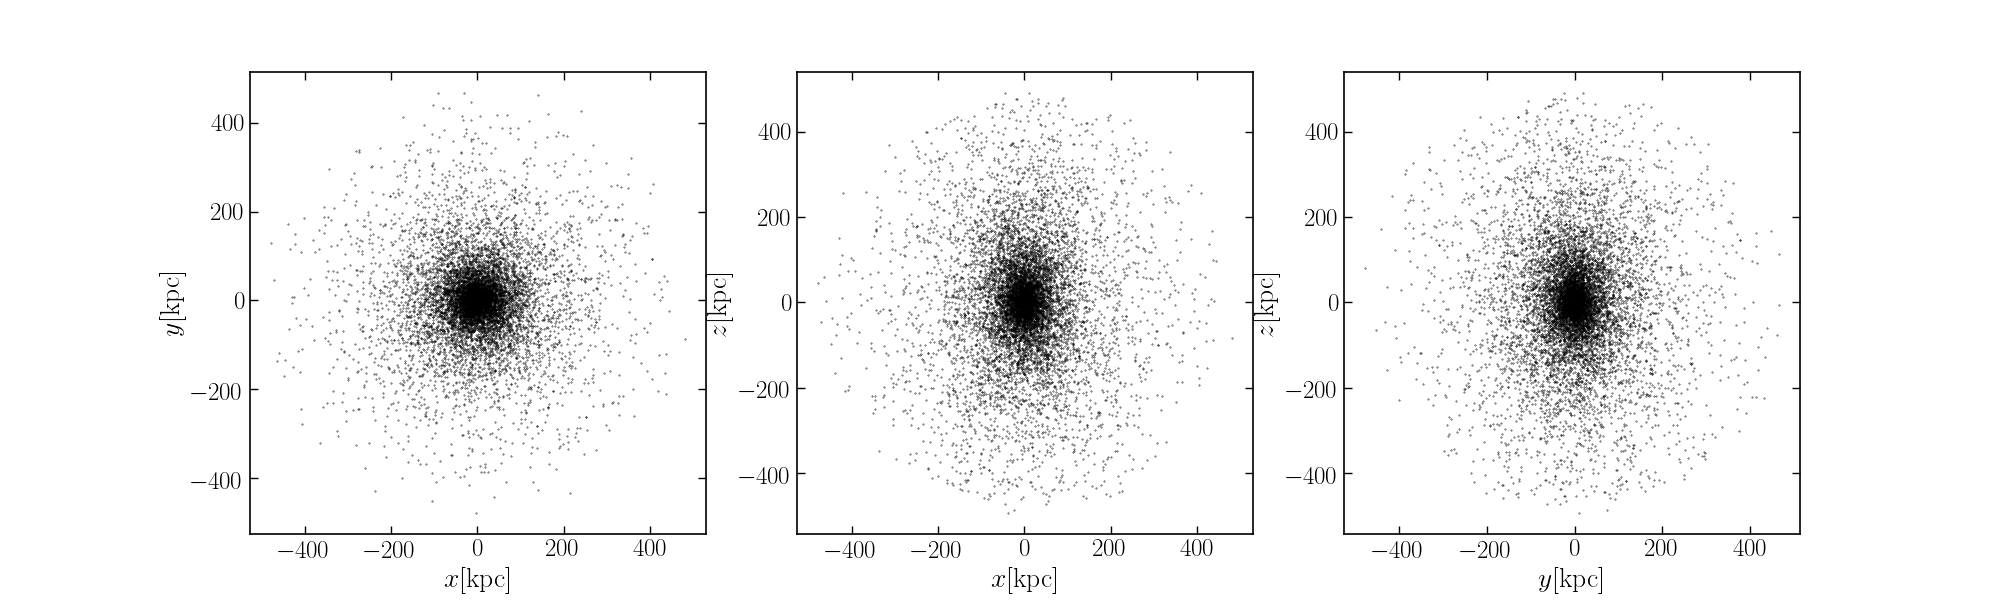

Text(0,0.5,'$z\\rm{[kpc]}$')

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,1], s=0.1, c='k')
ax[0].set_xlabel(r'$x\rm{[kpc]}$')
ax[0].set_ylabel(r'$y\rm{[kpc]}$')

ax[1].scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,2], s=0.1, c='k')
ax[1].set_xlabel(r'$x\rm{[kpc]}$')
ax[1].set_ylabel(r'$z\rm{[kpc]}$')

ax[2].scatter(pos_tr_pr[:10000,1], pos_tr_pr[:10000,2], s=0.1, c='k')
ax[2].set_xlabel(r'$y\rm{[kpc]}$')
ax[2].set_ylabel(r'$z\rm{[kpc]}$')


# Computing halo shape

## Method 1: In shells

In [80]:
# Fit ellisoid at 50 kpc:
def projected_ellipsoids(pos, r, dr, tol=1E-2, method='shells', projection='2d'):
    # Computing halo shape
    if method == 'shells':
        eigvec, axis, s, q = jellyfish.shapes.iterate_shell(pos, r, dr, tol)
        print(axis, s, q, eigvec)
    elif method == 'volume':
        eigvec, axis, s, q = jellyfish.shapes.iterate_volume(pos, r, tol)
        print(axis, s, q)

    # Get 3d sllipsoid coordinates
    xyz_ed_ellipse = jellyfish.shapes.ellipse_3dcartesian(axis, eigvec.T)
    
    if projection == '2d':
        # project in xy plane
        x_xy, y_xy = jellyfish.shapes.twod_surface(xyz_ed_ellipse[:,:,0].flatten(), xyz_ed_ellipse[:,:,1].flatten())

        # project in xy plane
        x_xz, z_xz = jellyfish.shapes.twod_surface(xyz_ed_ellipse[:,:,0].flatten(), xyz_ed_ellipse[:,:,2].flatten())

        # project in xy plane
        y_yz, z_yz = jellyfish.shapes.twod_surface(xyz_ed_ellipse[:,:,1].flatten(), xyz_ed_ellipse[:,:,2].flatten())

        return [x_xy, y_xy], [x_xz, z_xz], [y_yz, z_yz]
    
    elif projection == '3d':
        return xyz_ed_ellipse

In [81]:
xy_50_shell, xz_50_shell, yz_50_shell = projected_ellipsoids(pos_tr_pr, 50, 15)
xy_100_shell, xz_100_shell, yz_100_shell = projected_ellipsoids(pos_tr_pr, 100, 15)
xy_150_shell, xz_150_shell, yz_150_shell = projected_ellipsoids(pos_tr_pr, 150, 15)

[49.310875+0.j 44.46172 +0.j 41.737602+0.j] 0.8464178 0.90166146 [[-0.02817465  0.01169557 -0.99953467]
 [ 0.9994793   0.01605958 -0.02798526]
 [ 0.01572484 -0.9998027  -0.01214205]]
[95.82492+0.j 82.7056 +0.j 78.31619+0.j] 0.8172842 0.86309063 [[ 0.02529152  0.00261404  0.9996767 ]
 [ 0.99935144 -0.02570769 -0.02521612]
 [ 0.02563348  0.99966604 -0.00326269]]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


[144.73785 +0.j 121.94673 +0.j 113.216125+0.j] 0.7822151 0.84253526 [[-0.01401654 -0.0118615   0.99983144]
 [-0.998801    0.04707246 -0.01344364]
 [ 0.0469051   0.9988211   0.01250704]]


In [52]:
xyz_50_shell = projected_ellipsoids(pos_tr_pr, 50, 15, projection='3d')
xyz_100_shell = projected_ellipsoids(pos_tr_pr, 100, 15, projection='3d')
xyz_150_shell = projected_ellipsoids(pos_tr_pr, 150, 15, projection='3d')

[49.310875+0.j 44.46172 +0.j 41.737602+0.j] 0.8464178 0.90166146
[95.82492+0.j 82.7056 +0.j 78.31619+0.j] 0.8172842 0.86309063
[144.73785 +0.j 121.94673 +0.j 113.216125+0.j] 0.7822151 0.84253526


<IPython.core.display.Javascript object>


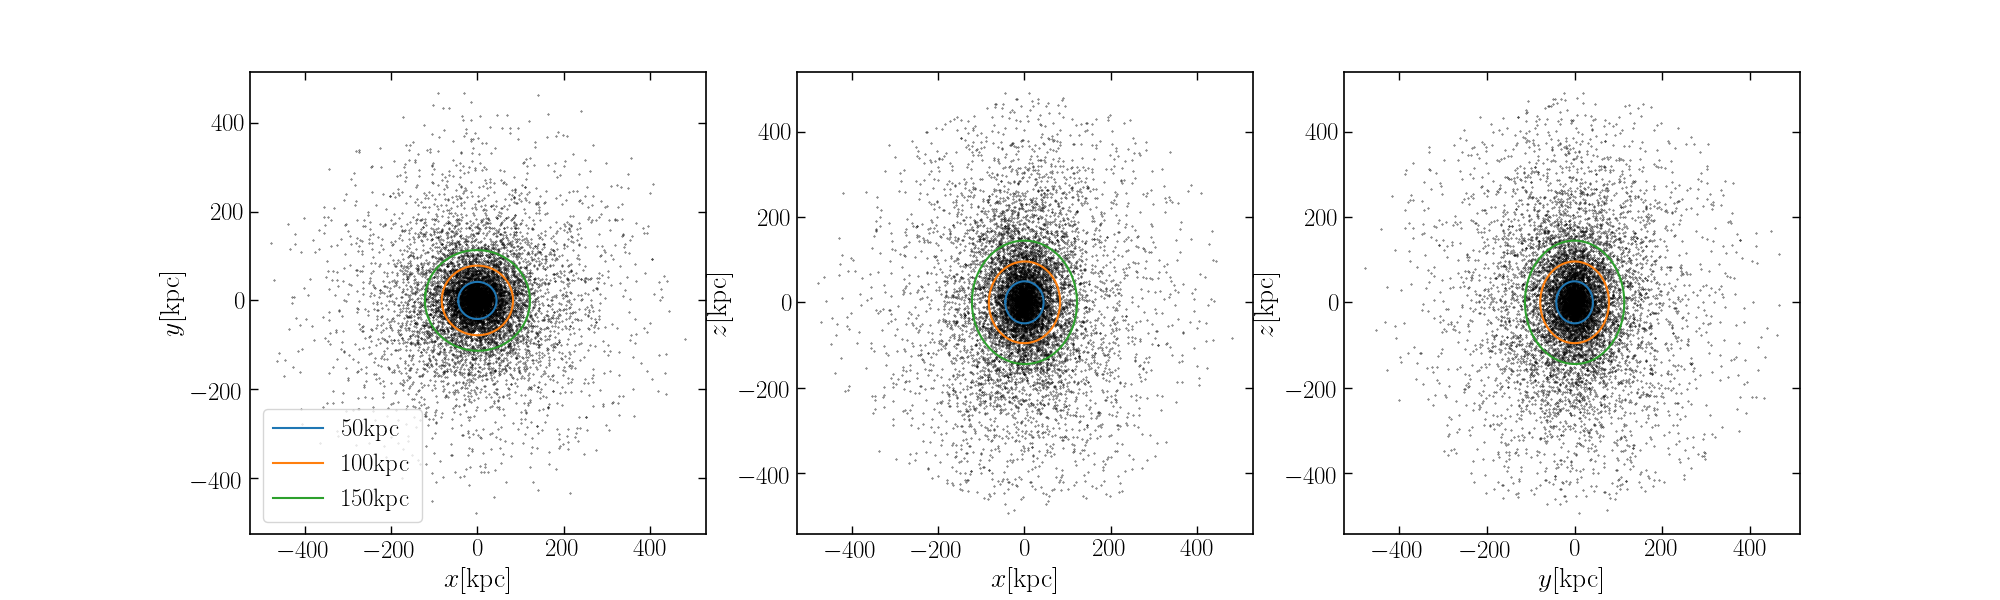

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [53]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,1], s=0.1, c='k')
ax[0].set_xlabel(r'$x\rm{[kpc]}$')
ax[0].set_ylabel(r'$y\rm{[kpc]}$')
ax[0].plot(xy_50_shell[0], xy_50_shell[1], label=r'$50 \rm{kpc}$')
ax[0].plot(xy_100_shell[0], xy_100_shell[1], label=r'$100 \rm{kpc}$')
ax[0].plot(xy_150_shell[0], xy_150_shell[1], label=r'$150 \rm{kpc}$')


ax[0].legend()

ax[1].scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,2], s=0.1, c='k')
ax[1].set_xlabel(r'$x\rm{[kpc]}$')
ax[1].set_ylabel(r'$z\rm{[kpc]}$')
ax[1].plot(xz_50_shell[0], xz_50_shell[1])
ax[1].plot(xz_100_shell[0], xz_100_shell[1])
ax[1].plot(xz_150_shell[0], xz_150_shell[1])



ax[2].scatter(pos_tr_pr[:10000,1], pos_tr_pr[:10000,2], s=0.1, c='k')
ax[2].set_xlabel(r'$y\rm{[kpc]}$')
ax[2].set_ylabel(r'$z\rm{[kpc]}$')
ax[2].plot(yz_50_shell[0], yz_50_shell[1])
ax[2].plot(yz_100_shell[0], yz_100_shell[1])
ax[2].plot(yz_150_shell[0], yz_150_shell[1])

In [54]:
np.shape(xyz_100_shell[:,:,0])

(100, 100)

<IPython.core.display.Javascript object>


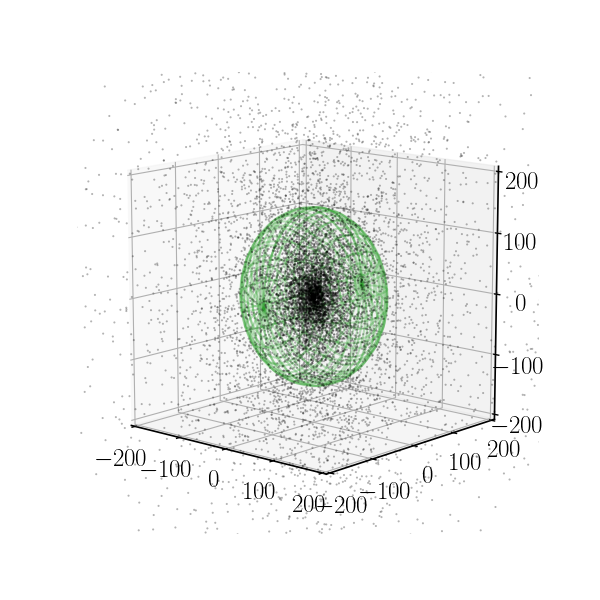

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-200, 200)

In [55]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(pos_tr_pr[:10000,0], pos_tr_pr[:10000,1], pos_tr_pr[:10000,2], marker='.', color='k', s=1, alpha=0.3)
ax.plot_wireframe(xyz_150_shell[:,:,0], xyz_150_shell[:,:,1], xyz_150_shell[:,:,2], rstride=4, cstride=4, 
                  color='C2', alpha=0.3)

#ax.plot_wireframe(xyz_100_shell[:,:,0], xyz_100_shell[:,:,1], xyz_100_shell[:,:,2], rstride=4, cstride=4, 
#                  color='C3', alpha=0.3)


#ax.plot_wireframe(xyz_50_shell[:,:,0], xyz_50_shell[:,:,1], xyz_50_shell[:,:,2], rstride=4, cstride=4, 
#                  color='C4', alpha=0.3)

ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-200, 200)


# Test - Rotating the halo

The eigenvaalues of the Shape tensor are proportional to the length of the principal axes. 
The eigenvectors give the directions of those axis.

I compute the eigenvectors
and then the euler angle from the original basis defined as

$\hat{x}=(\hat{i}, 0, 0)$,

$\hat{y}=(0, \hat{j}, 0)$,

$\hat{z}=(0, 0, \hat{k})$


Then I rotate an ellisoid to the principal basis to plot the ellipsoid


The principal new axes are: $\hat{x'}, \hat{y'}, \hat{z'}$

And since ${V'} = R V$ and $V=I$ then the rotation matrix $R$ is the eigevectors matrix

In [69]:
def y_rotation(vector,theta):
    """Rotates 3-D vector around y-axis"""
    R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta), 0, np.cos(theta)]])
    return np.dot(R,vector.T).T


def x_rotation(vector,theta):
    """Rotates 3-D vector around x-axis"""
    R = np.array([[0, np.cos(theta),np.sin(theta)],[1,0,0],[0, -np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector.T).T

def z_rotation(vector,theta):
    """Rotates 3-D vector around z-axis"""
    R = np.array([[np.cos(theta),np.sin(theta), 0],[0,0,1],[0, -np.sin(theta), np.cos(theta)]])
    return np.dot(R,vector.T).T


In [70]:
pos_rot = x_rotation(pos_tr_pr, np.pi/4.)

<IPython.core.display.Javascript object>


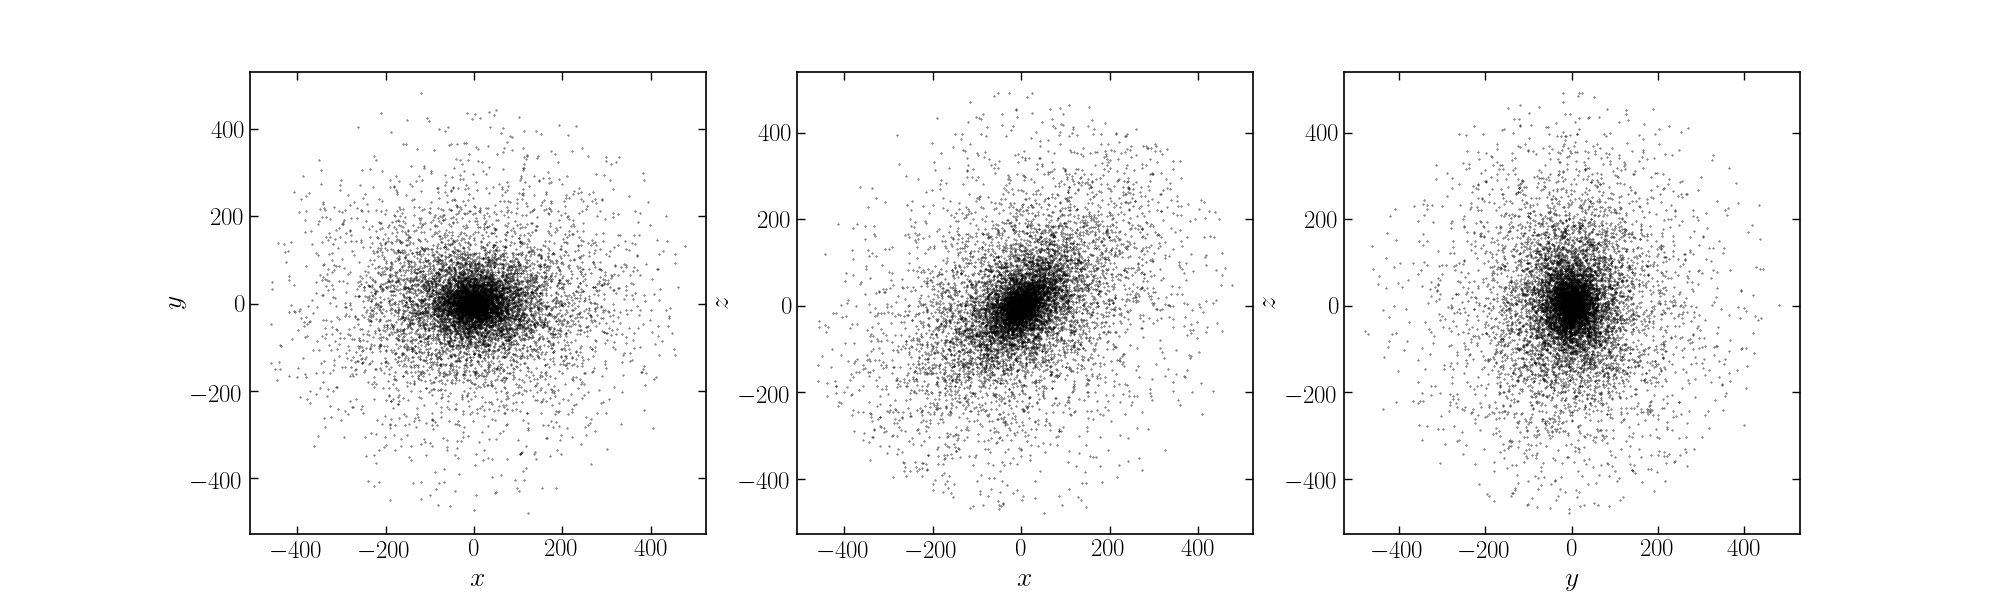

Text(0,0.5,'$z$')

In [71]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(pos_rot[:10000,0], pos_rot[:10000,1], s=0.1, c='k')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.subplot(1, 3, 2)
plt.scatter(pos_rot[:10000,0], pos_rot[:10000,2], s=0.1, c='k')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$z$', fontsize=20)
plt.subplot(1, 3, 3)
plt.scatter(pos_rot[:10000,1], pos_rot[:10000,2], s=0.1, c='k')
plt.xlabel('$y$', fontsize=20)
plt.ylabel('$z$', fontsize=20)

In [82]:
xy_50_shell_rot, xz_50_shell_rot, yz_50_shell_rot = projected_ellipsoids(pos_rot, 50, 15)
xy_100_shell_rot, xz_100_shell_rot, yz_100_shell_rot = projected_ellipsoids(pos_rot, 100, 15)
xy_150_shell_rot, xz_150_shell_rot, yz_150_shell_rot = projected_ellipsoids(pos_rot, 150, 15)

[50.04707319+0.j 38.49671265+0.j 37.54855703+0.j] 0.7502647934080472 0.7692100695120887 [[ 0.89232471 -0.44938176  0.04257512]
 [-0.00350316  0.0874221   0.9961652 ]
 [ 0.45138047  0.88905197 -0.07643465]]
[98.57692264+0.j 73.15032056+0.j 70.56778038+0.j] 0.7158651182524388 0.7420633409806519 [[ 8.72946445e-01  4.86234316e-01  3.92516859e-02]
 [ 1.50430047e-04  8.01957868e-02 -9.96779120e-01]
 [ 4.87816033e-01 -8.70140693e-01 -6.99334827e-02]]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


[146.45585585+0.j 106.69386235+0.j 103.57984445+0.j] 0.7072427650552432 0.72850526685853 [[ 0.85603485  0.51617663  0.02767692]
 [ 0.01592694  0.02717901 -0.99950369]
 [ 0.51667268 -0.85605081 -0.01504507]]


In [77]:
xyz_50_shell_rot = projected_ellipsoids(pos_rot, 50, 15, projection='3d')
xyz_100_shell_rot = projected_ellipsoids(pos_rot, 100, 15, projection='3d')
xyz_150_shell_rot = projected_ellipsoids(pos_rot, 150, 15, projection='3d')

[50.04707319+0.j 38.49671265+0.j 37.54855703+0.j] 0.7502647934080472 0.7692100695120887
[98.57692264+0.j 73.15032056+0.j 70.56778038+0.j] 0.7158651182524388 0.7420633409806519
[146.45585585+0.j 106.69386235+0.j 103.57984445+0.j] 0.7072427650552432 0.72850526685853


<IPython.core.display.Javascript object>


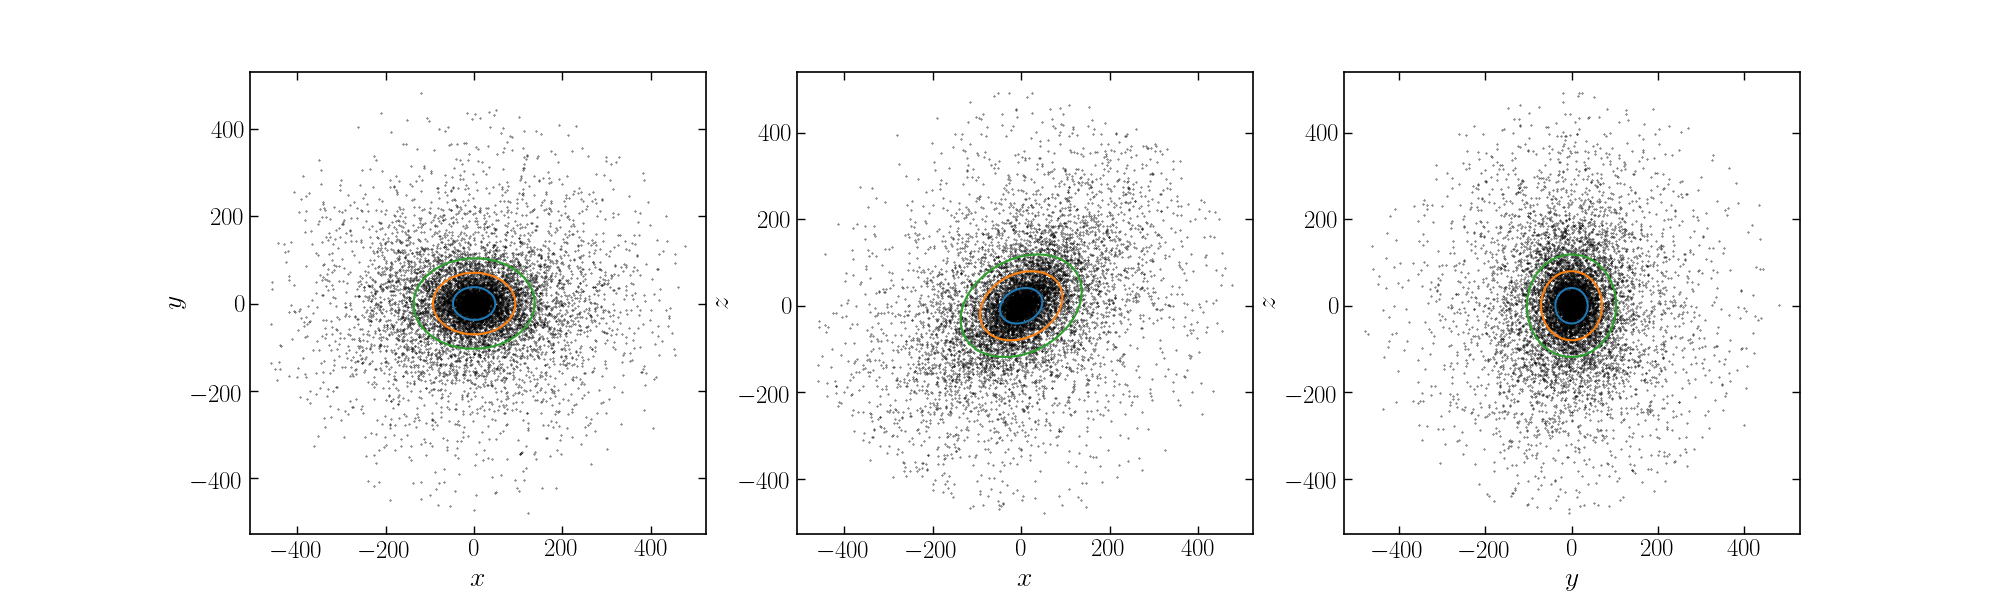

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'$z$')

In [78]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)

plt.scatter(pos_rot[:10000,0], pos_rot[:10000,1], s=0.1, c='k')
plt.plot(xy_50_shell_rot[0], xy_50_shell_rot[1])
plt.plot(xy_100_shell_rot[0], xy_100_shell_rot[1])
plt.plot(xy_150_shell_rot[0], xy_150_shell_rot[1])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

plt.subplot(1, 3, 2)
plt.scatter(pos_rot[:10000,0], pos_rot[:10000,2], s=0.1, c='k')
plt.plot(xz_50_shell_rot[0], xz_50_shell_rot[1])
plt.plot(xz_100_shell_rot[0], xz_100_shell_rot[1])
plt.plot(xz_150_shell_rot[0], xz_150_shell_rot[1])

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$z$', fontsize=20)


plt.subplot(1, 3, 3)
plt.scatter(pos_rot[:10000,1], pos_rot[:10000,2], s=0.1, c='k')
plt.plot(yz_50_shell_rot[0], yz_50_shell_rot[1])
plt.plot(yz_100_shell_rot[0], yz_100_shell_rot[1])
plt.plot(yz_150_shell_rot[0], yz_150_shell_rot[1])
plt.xlabel('$y$', fontsize=20)
plt.ylabel('$z$', fontsize=20)

<IPython.core.display.Javascript object>


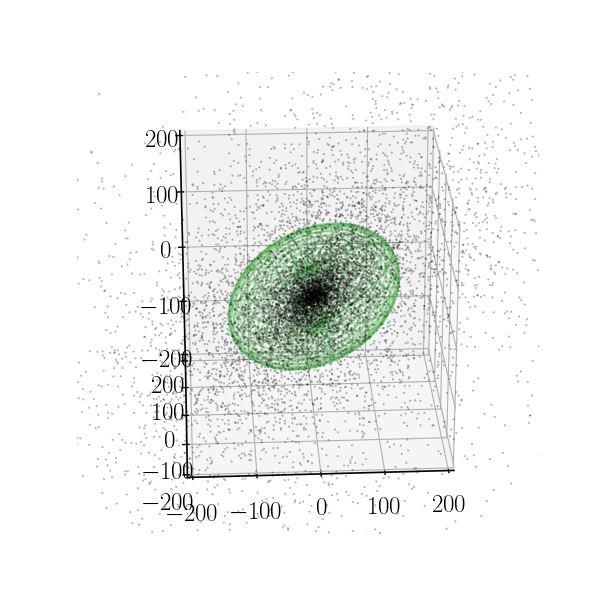

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-200, 200)

In [79]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(pos_rot[:10000,0], pos_rot[:10000,1], pos_rot[:10000,2], marker='.', color='k', s=1, alpha=0.3)
ax.plot_wireframe(xyz_150_shell_rot[:,:,0], xyz_150_shell_rot[:,:,1], xyz_150_shell_rot[:,:,2], rstride=4, cstride=4, 
                  color='C2', alpha=0.3)

#ax.plot_wireframe(xyz_100_shell[:,:,0], xyz_100_shell[:,:,1], xyz_100_shell[:,:,2], rstride=4, cstride=4, 
#                  color='C3', alpha=0.3)


#ax.plot_wireframe(xyz_50_shell[:,:,0], xyz_50_shell[:,:,1], xyz_50_shell[:,:,2], rstride=4, cstride=4, 
#                  color='C4', alpha=0.3)

ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-200, 200)